Potential Other Questions: Can we determine position type based on weight or other statistics?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import urllib2
import urllib
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import json
import re
import seaborn as sns
from sklearn import tree

In [2]:
#All active players don't have "years played" information -> set values to "Active"
#All retired players don't have "current team" information -> set values to "Retired"
#All retired players don't have "Position" information -> set values to "TBD"
    #These positions will have to be updated based on crossreferencing with the other .csv statistics files
Basic_Stats = pd.read_csv("./Basic_Stats.csv");
Basic_Stats = pd.DataFrame(data = Basic_Stats)

print Basic_Stats.info(), "\n\n"
Basic_Stats['Current Team'].replace(np.nan,'Retired', inplace=True);
Basic_Stats['Years Played'].replace(np.nan,'Active', inplace=True);
#Basic_Stats['Position'].replace(np.nan,0, inplace=True);

#Assign positions to numerical values
'''
Basic_Stats['Position'].replace(['QB'],1, inplace=True);
Basic_Stats['Position'].replace(['RB'],2, inplace=True);
Basic_Stats['Position'].replace(['FB'],3, inplace=True);
Basic_Stats['Position'].replace(['WR'],4, inplace=True);
Basic_Stats['Position'].replace(['TE'],5, inplace=True);
Basic_Stats['Position'].replace(['OL','OG','G','C','T','OT'],6, inplace=True);
Basic_Stats['Position'].replace(['DE','DT','NT','DL'],7, inplace=True);
Basic_Stats['Position'].replace(['OLB', 'ILB','LB','MLB'],8, inplace=True);
Basic_Stats['Position'].replace(['SS','FS','SAF','LS'],9, inplace=True);
Basic_Stats['Position'].replace(['CB','DB'],10, inplace=True);
Basic_Stats['Position'].replace(['K','P'],11, inplace=True);
'''

#Assign positions to positional groups

Basic_Stats['Position'].replace(['QB'],0, inplace=True);
Basic_Stats['Position'].replace(['RB','FB'],1, inplace=True);
Basic_Stats['Position'].replace(['WR','TE'],2, inplace=True);
Basic_Stats['Position'].replace(['OL','OG','G','C','T','OT'],3, inplace=True);
Basic_Stats['Position'].replace(['DE','DT','NT','DL'],4, inplace=True);
Basic_Stats['Position'].replace(['OLB', 'ILB','LB','MLB'],5, inplace=True);
Basic_Stats['Position'].replace(['SS','FS','SAF','LS','CB','DB'],6, inplace=True);
Basic_Stats['Position'].replace(['K','P'],7, inplace=True);


#Delete sparse data 
Basic_Stats = Basic_Stats.drop(['Number'], axis=1)
Basic_Stats = Basic_Stats.drop(['High School'], axis=1)
Basic_Stats = Basic_Stats.drop(['High School Location'], axis=1)
Basic_Stats = Basic_Stats.drop(['Age'], axis=1)
Basic_Stats = Basic_Stats.dropna(axis = 0, how="any")
Data = Basic_Stats.drop(['Position'], axis=1)
#Turn experience column into int64 data type by removing "Seasons"
Basic_Stats['Experience'] = pd.Series(Basic_Stats['Experience']).str.replace(' Seasons', '')
Basic_Stats['Experience'] = pd.to_numeric(Basic_Stats['Experience'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17172 entries, 0 to 17171
Data columns (total 16 columns):
Age                     13504 non-null float64
Birth Place             14794 non-null object
Birthday                16835 non-null object
College                 17133 non-null object
Current Status          17172 non-null object
Current Team            3096 non-null object
Experience              17133 non-null object
Height (inches)         17026 non-null float64
High School             2514 non-null object
High School Location    2510 non-null object
Name                    17172 non-null object
Number                  1708 non-null float64
Player Id               17172 non-null object
Position                3096 non-null object
Weight (lbs)            17121 non-null float64
Years Played            14076 non-null object
dtypes: float64(4), object(12)
memory usage: 2.1+ MB
None 




Correlations:
                   Experience  Height (inches)  Position  Weight (lbs)
Experience         1.000000         0.001622  0.035509      0.063097
Height (inches)    0.001622         1.000000 -0.177665      0.701241
Position           0.035509        -0.177665  1.000000     -0.142745
Weight (lbs)       0.063097         0.701241 -0.142745      1.000000 


[[1.         0.70124147]
 [0.70124147 1.        ]]
[[ 1.         -0.17766542]
 [-0.17766542  1.        ]]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2514 entries, 4 to 17157
Data columns (total 12 columns):
Birth Place        2514 non-null object
Birthday           2514 non-null object
College            2514 non-null object
Current Status     2514 non-null object
Current Team       2514 non-null object
Experience         2514 non-null int64
Height (inches)    2514 non-null float64
Name               2514 non-null object
Player Id          2514 non-null object
Position           2514 non-null float64
Weight (lbs)       25

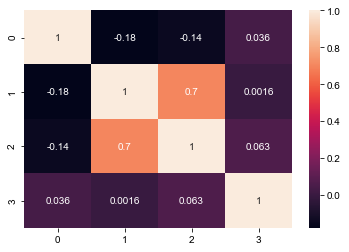

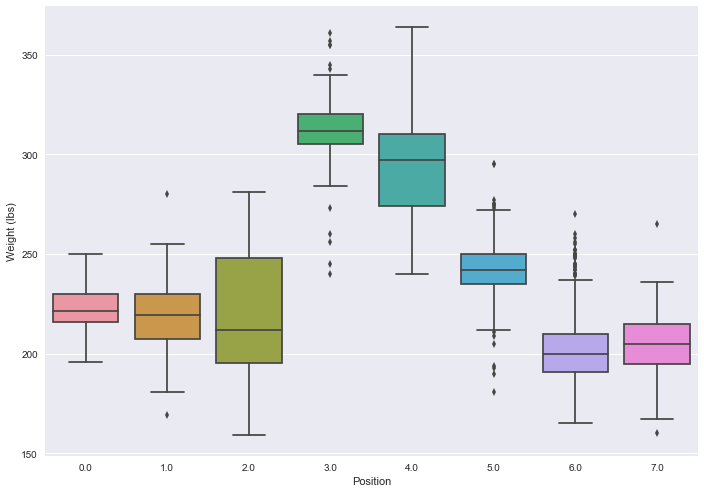

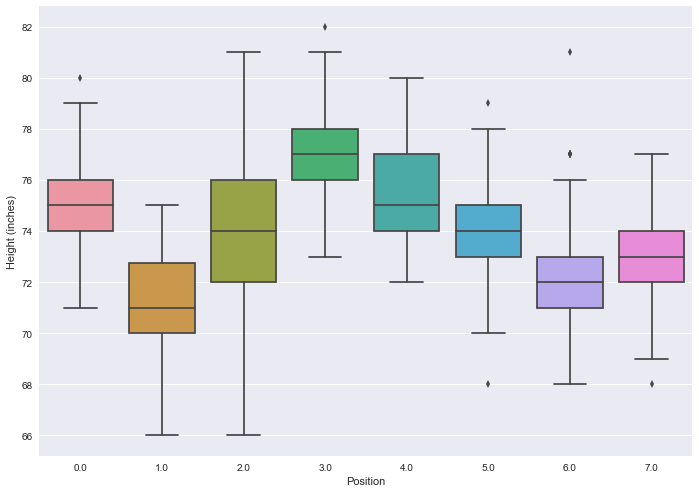

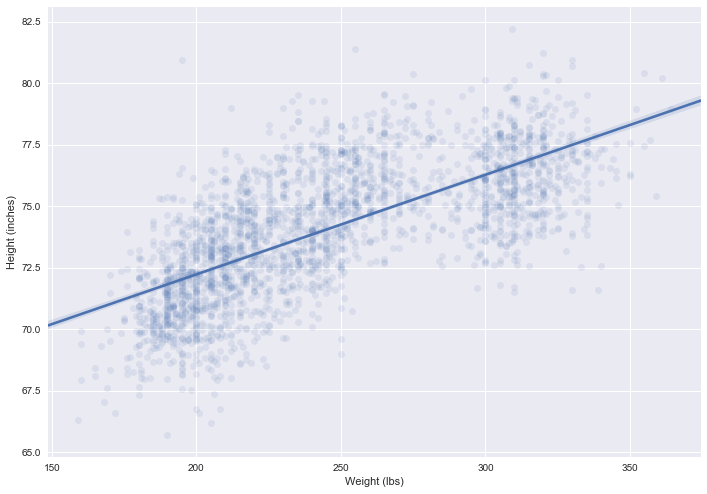

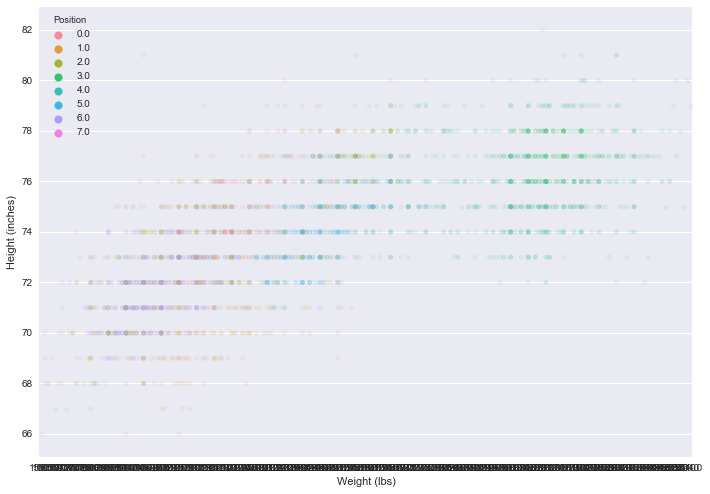

In [3]:
#################
##  TODO: Need to find way to correlate discrete data objects
#################
print "Correlations:\n ",Basic_Stats.corr(method='pearson'), "\n\n"

HeightWeight = np.corrcoef(Basic_Stats['Weight (lbs)'],Basic_Stats['Height (inches)'])
print HeightWeight;

HeightPosition = np.corrcoef(Basic_Stats['Position'],Basic_Stats['Height (inches)'])
print HeightPosition;

coef = np.corrcoef([Basic_Stats['Position'],Basic_Stats['Height (inches)'],Basic_Stats['Weight (lbs)'],Basic_Stats['Experience']])
plt.plot(figsize=(10,10))
sns.heatmap(coef, annot=True)

#Box plot of Weight ranges for each position
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.figure()
sns.boxplot(x="Position", y="Weight (lbs)", data=Basic_Stats);
plt.figure()
sns.boxplot(x="Position", y="Height (inches)", data=Basic_Stats);
plt.figure()
sns.regplot(x="Weight (lbs)", y="Height (inches)", data=Basic_Stats, y_jitter=.5, scatter_kws={'alpha':0.1});
plt.figure()
sns.stripplot(x="Weight (lbs)", y="Height (inches)", data=Basic_Stats, hue = 'Position', alpha=0.1);
print Basic_Stats.info(), "\n\n"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4302 entries, 0 to 4301
Data columns (total 7 columns):
Player Id           4302 non-null object
Games Played        4302 non-null int64
Total Tackles       4302 non-null int64
Solo Tackles        4302 non-null int64
Assisted Tackles    4302 non-null int64
Sacks               4302 non-null float64
Ints                4302 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 235.3+ KB
None


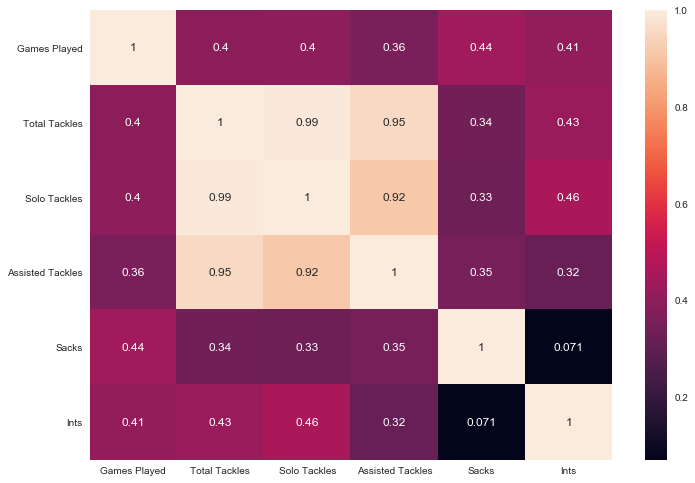

In [4]:
"""
Standardize Defensive Career Stats and Group By Player ID
"""
Defensive_Stats = pd.read_csv("./Career_Stats_Defensive.csv");
Defensive_Stats = Defensive_Stats.drop(['Name'], axis=1)
Defensive_Stats = Defensive_Stats.drop(['Position'], axis=1)
Defensive_Stats = Defensive_Stats.drop(['Year'], axis=1)
Defensive_Stats = Defensive_Stats.drop(['Team'], axis=1)
Defensive_Stats['Total Tackles'].replace('--',0, inplace=True);
Defensive_Stats['Total Tackles'] = pd.to_numeric(Defensive_Stats['Total Tackles'])
Defensive_Stats['Solo Tackles'].replace('--',0, inplace=True);
Defensive_Stats['Solo Tackles'] = pd.to_numeric(Defensive_Stats['Solo Tackles'])
Defensive_Stats['Assisted Tackles'].replace('--',0, inplace=True);
Defensive_Stats['Assisted Tackles'] = pd.to_numeric(Defensive_Stats['Assisted Tackles'])
Defensive_Stats['Sacks'].replace('--',0, inplace=True);
Defensive_Stats['Sacks'] = pd.to_numeric(Defensive_Stats['Sacks'])
Defensive_Stats['Ints'].replace('--',0, inplace=True);
Defensive_Stats['Ints'] = pd.to_numeric(Defensive_Stats['Ints'])
Defensive_Stats = Defensive_Stats[Defensive_Stats.columns.drop(list(Defensive_Stats.filter(regex='Per')))]
Defensive_Stats = Defensive_Stats.groupby(Defensive_Stats['Player Id']).sum()
Defensive_Stats.reset_index(level=0, inplace=True)
Defensive_Coef = Defensive_Stats.corr()
plt.plot(figsize=(10,10))
sns.heatmap(Defensive_Coef, annot=True)
print Defensive_Stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 12 columns):
Player Id                      1323 non-null object
Games Played                   1323 non-null int64
Passes Attempted               1323 non-null int64
Passes Completed               1323 non-null int64
TD Passes                      1323 non-null int64
Ints                           1323 non-null int64
Int Rate                       1323 non-null float64
Passes Longer than 20 Yards    1323 non-null int64
Passes Longer than 40 Yards    1323 non-null int64
Sacks                          1323 non-null int64
Sacked Yards Lost              1323 non-null int64
Passer Rating                  1323 non-null float64
dtypes: float64(2), int64(9), object(1)
memory usage: 124.1+ KB
None


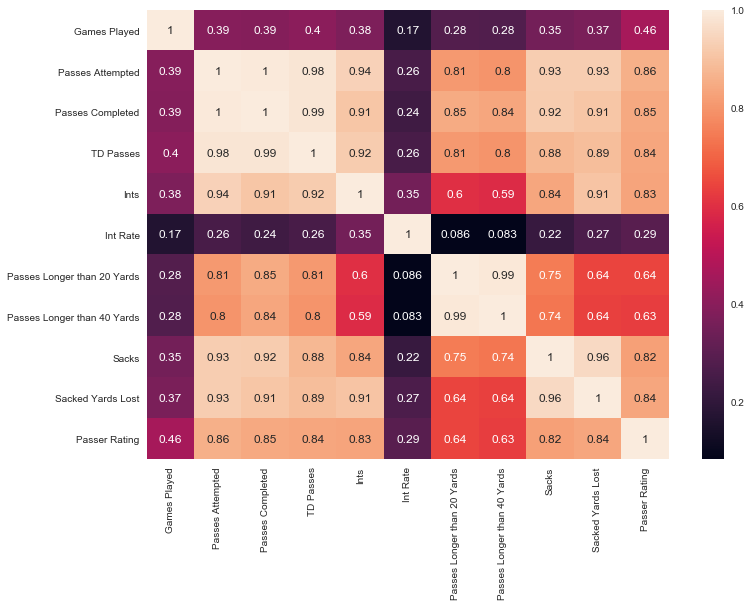

In [5]:
"""
Standardize Passing Stats
"""
Passing_Stats = pd.read_csv("./Career_Stats_Passing.csv");
Passing_Stats = Passing_Stats.drop(['Name'], axis=1)
Passing_Stats = Passing_Stats.drop(['Position'], axis=1)
Passing_Stats = Passing_Stats.drop(['Year'], axis=1)
Passing_Stats = Passing_Stats.drop(['Team'], axis=1)
Passing_Stats = Passing_Stats.drop(['Completion Percentage'], axis=1)
Passing_Stats = Passing_Stats[Passing_Stats.columns.drop(list(Passing_Stats.filter(regex='Per')))]
Passing_Stats = Passing_Stats.groupby(Passing_Stats['Player Id']).sum()
Passing_Stats.reset_index(level=0, inplace=True)
Passing_Coef = Passing_Stats.corr()
plt.plot(figsize=(10,10))
sns.heatmap(Passing_Coef, annot=True)
print Passing_Stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 8 columns):
Player Id                          3577 non-null object
Games Played                       3577 non-null int64
Receptions                         3577 non-null int64
Receiving TDs                      3577 non-null int64
Receptions Longer than 20 Yards    3577 non-null int64
Receptions Longer than 40 Yards    3577 non-null int64
First Down Receptions              3577 non-null int64
Fumbles                            3577 non-null int64
dtypes: int64(7), object(1)
memory usage: 223.6+ KB
None


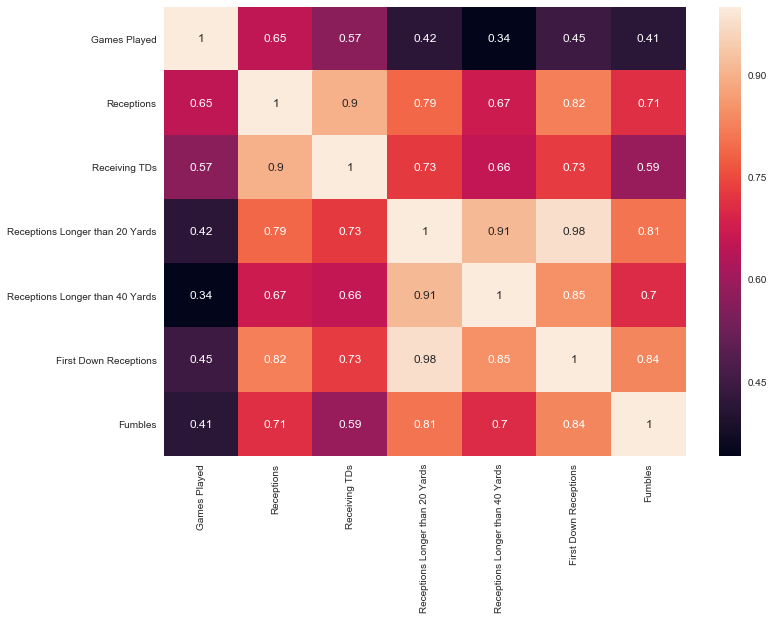

In [6]:
"""
Standardizes Receiving Stats
"""
Receiving_Stats = pd.read_csv("./Career_Stats_Receiving.csv");
Receiving_Stats = Receiving_Stats.drop(['Name'], axis=1)
Receiving_Stats = Receiving_Stats.drop(['Position'], axis=1)
Receiving_Stats = Receiving_Stats.drop(['Year'], axis=1)
Receiving_Stats = Receiving_Stats.drop(['Team'], axis=1)
Receiving_Stats = Receiving_Stats.groupby(Receiving_Stats['Player Id']).sum()
Receiving_Stats = Receiving_Stats[Receiving_Stats.columns.drop(list(Receiving_Stats.filter(regex='Per')))]
Receiving_Stats.reset_index(level=0, inplace=True)
Receiving_Coef = Receiving_Stats.corr()
plt.plot(figsize=(10,10))
sns.heatmap(Receiving_Coef, annot=True)
print Receiving_Stats.info()

In [7]:
"""
Standardizes Offensive Line Stats
OL Might need to be dropped due to lack of stats unless Height and Weight play key factors in linemen
"""
Offensive_Line_Stats = pd.read_csv("./Career_Stats_Offensive_Line.csv");
Offensive_Line_Stats = Offensive_Line_Stats.drop(['Name'], axis=1)
Offensive_Line_Stats = Offensive_Line_Stats.drop(['Position'], axis=1)
Offensive_Line_Stats = Offensive_Line_Stats.drop(['Year'], axis=1)
Offensive_Line_Stats = Offensive_Line_Stats.drop(['Team'], axis=1)
Offensive_Line_Stats = Offensive_Line_Stats.groupby(Offensive_Line_Stats['Player Id']).sum()
Offensive_Line_Stats = Offensive_Line_Stats[Offensive_Line_Stats.columns.drop(list(Offensive_Line_Stats.filter(regex='Per')))]
Offensive_Line_Stats.reset_index(level=0, inplace=True)

print Offensive_Line_Stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2885 entries, 0 to 2884
Data columns (total 3 columns):
Player Id        2885 non-null object
Games Played     2885 non-null int64
Games Started    2885 non-null int64
dtypes: int64(2), object(1)
memory usage: 67.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 10 columns):
Player Id                    182 non-null object
Games Played                 182 non-null int64
Kickoffs                     182 non-null int64
Out of Bounds Kickoffs       182 non-null int64
Touchbacks                   182 non-null int64
Kickoffs Returned            182 non-null int64
Average Returned Yards       182 non-null float64
Kickoffs Resulting in TDs    182 non-null int64
On Sides Kicks               182 non-null int64
On Sides Kicks Returned      182 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 14.3+ KB
None


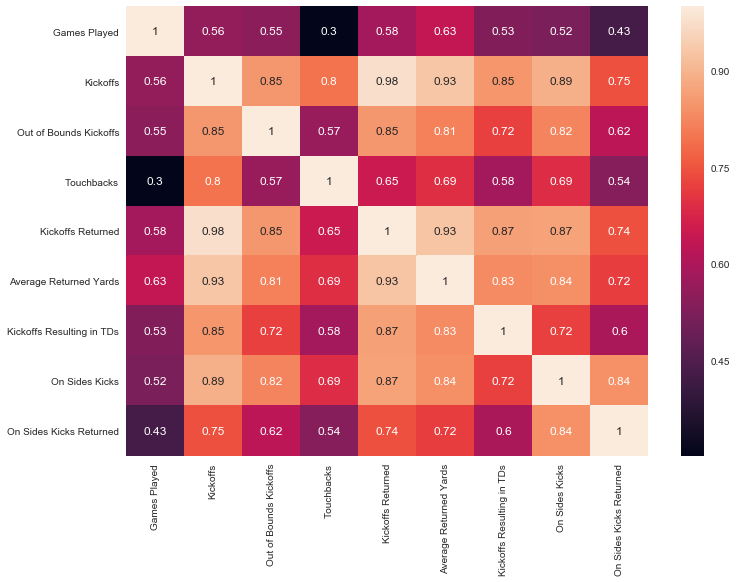

In [8]:
"""
Standardizes Kicker Stats
"""
Kicker_Stats = pd.read_csv("./Career_Stats_Kickoff.csv");
Kicker_Stats = Kicker_Stats.drop(['Name'], axis=1)
Kicker_Stats = Kicker_Stats.drop(['Position'], axis=1)
Kicker_Stats = Kicker_Stats.drop(['Year'], axis=1)
Kicker_Stats = Kicker_Stats.drop(['Team'], axis=1)
Kicker_Stats = Kicker_Stats.groupby(Kicker_Stats['Player Id']).sum()
Kicker_Stats = Kicker_Stats[Kicker_Stats.columns.drop(list(Kicker_Stats.filter(regex='Per')))]
Kicker_Stats.reset_index(level=0, inplace=True)
Kicker_Coef = Kicker_Stats.corr()
plt.plot(figsize=(10,10))
sns.heatmap(Kicker_Coef, annot=True)
print Kicker_Stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 15 columns):
Player Id                    463 non-null object
Games Played                 463 non-null int64
Punts                        463 non-null int64
Longest Punt                 463 non-null int64
Gross Punting Average        463 non-null float64
Net Punting Average          463 non-null float64
Punts Blocked                463 non-null int64
Out of Bounds Punts          463 non-null int64
Downed Punts                 463 non-null int64
Punts Inside 20 Yard Line    463 non-null int64
Touchbacks                   463 non-null int64
Fair Catches                 463 non-null int64
Punts Returned               463 non-null int64
Yards Returned on Punts      463 non-null int64
TDs Returned on Punt         463 non-null int64
dtypes: float64(2), int64(12), object(1)
memory usage: 54.3+ KB
None


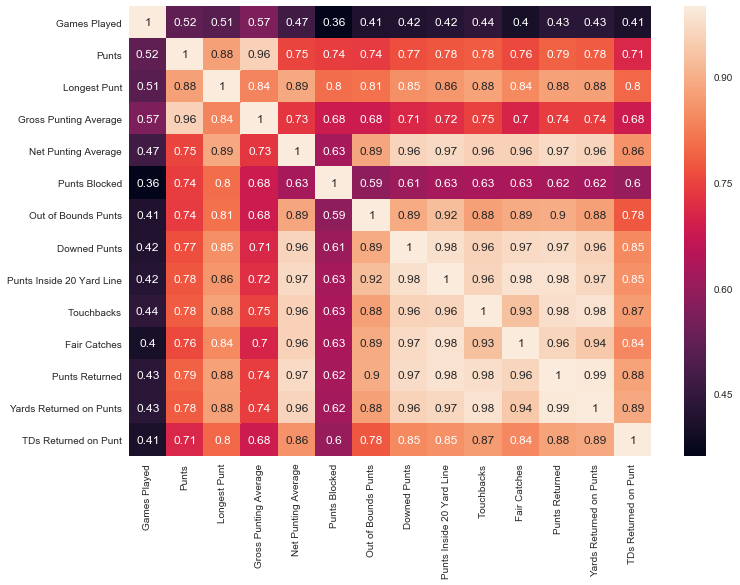

In [9]:
"""
Standardizes Punter Stats
"""
Punter_Stats = pd.read_csv("./Career_Stats_Punting.csv");
Punter_Stats = Punter_Stats.drop(['Name'], axis=1)
Punter_Stats = Punter_Stats.drop(['Position'], axis=1)
Punter_Stats = Punter_Stats.drop(['Year'], axis=1)
Punter_Stats = Punter_Stats.drop(['Team'], axis=1)
Punter_Stats = Punter_Stats.groupby(Punter_Stats['Player Id']).sum()
Punter_Stats = Punter_Stats[Punter_Stats.columns.drop(list(Punter_Stats.filter(regex='Per')))]
Punter_Stats.reset_index(level=0, inplace=True)
Punter_Coef = Punter_Stats.corr()
plt.plot(figsize=(10,10))
sns.heatmap(Punter_Coef, annot=True)
print Punter_Stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3190 entries, 0 to 3189
Data columns (total 8 columns):
Player Id                     3190 non-null object
Games Played                  3190 non-null int64
Rushing Attempts              3190 non-null int64
Rushing TDs                   3190 non-null int64
Rushing First Downs           3190 non-null int64
Rushing More Than 20 Yards    3190 non-null int64
Rushing More Than 40 Yards    3190 non-null int64
Fumbles                       3190 non-null int64
dtypes: int64(7), object(1)
memory usage: 199.4+ KB
None


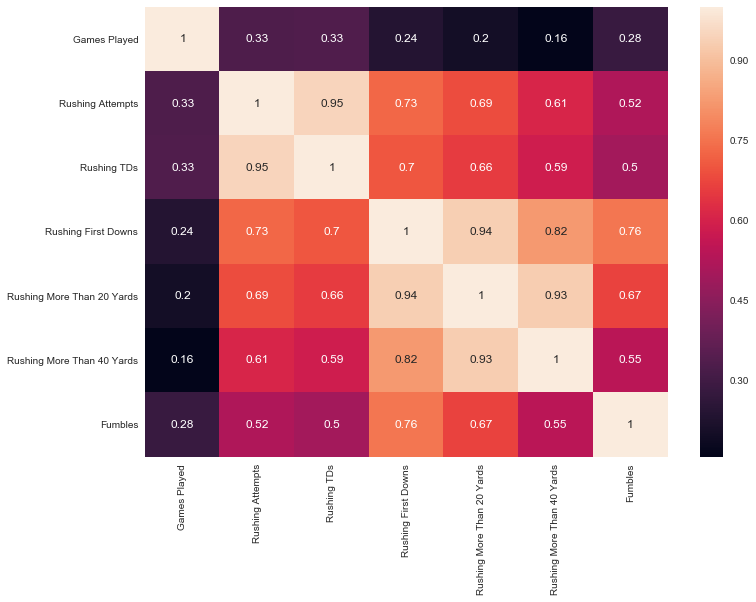

In [10]:
"""
Standardizes Rusher Stats
"""
Rusher_Stats = pd.read_csv("./Career_Stats_Rushing.csv");
Rusher_Stats = Rusher_Stats.drop(['Name'], axis=1)
Rusher_Stats = Rusher_Stats.drop(['Position'], axis=1)
Rusher_Stats = Rusher_Stats.drop(['Year'], axis=1)
Rusher_Stats = Rusher_Stats.drop(['Team'], axis=1)
Rusher_Stats = Rusher_Stats.groupby(Rusher_Stats['Player Id']).sum()
Rusher_Stats = Rusher_Stats[Rusher_Stats.columns.drop(list(Rusher_Stats.filter(regex='Per')))]
Rusher_Stats.reset_index(level=0, inplace=True)
Rusher_Coef = Rusher_Stats.corr()
plt.plot(figsize=(10,10))
sns.heatmap(Rusher_Coef, annot=True)
print Rusher_Stats.info()

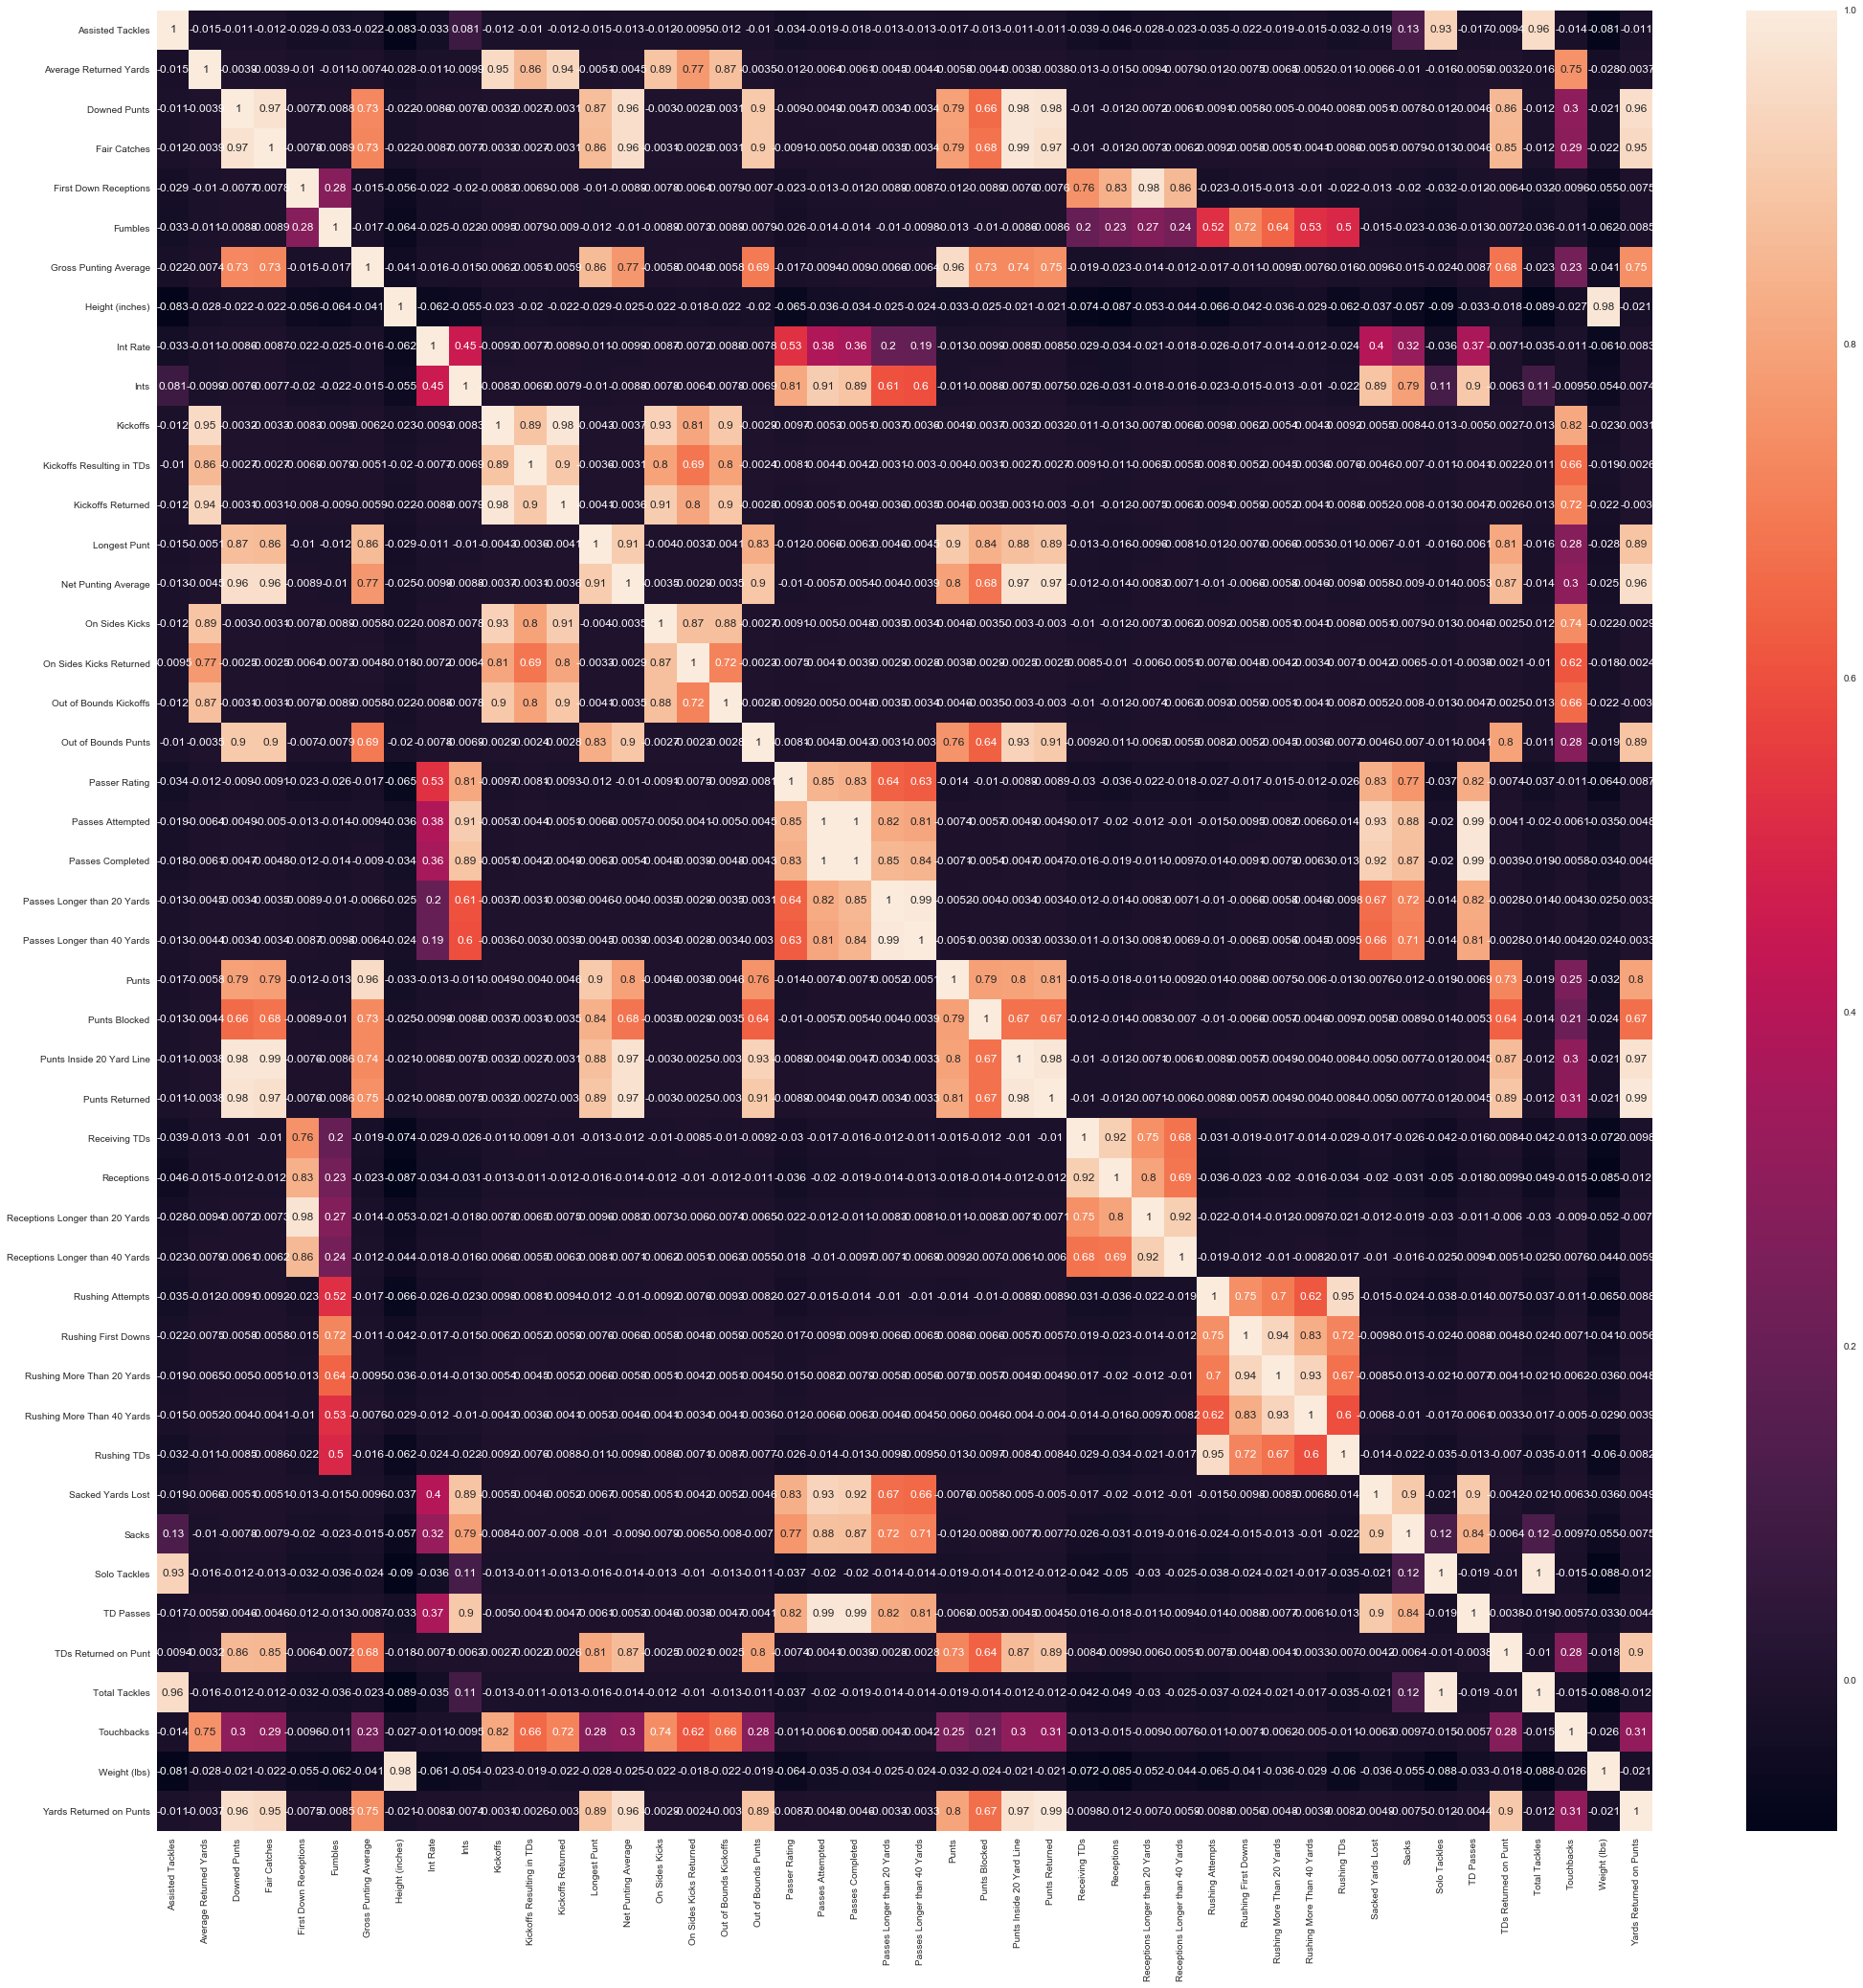

In [11]:
"""
Merge all data frames into one massive one based on player ID
"""
Statistics = pd.concat([Basic_Stats, Passing_Stats,Rusher_Stats,Kicker_Stats,Punter_Stats,Offensive_Line_Stats,Receiving_Stats,Defensive_Stats])
Statistics = Statistics.fillna(0)
#Need to replace all NaN Statistics values with 0
#df = Statistics.drop(['Games Played', 'Games Started','Height (inches)', 'Weight (lbs)','Experience','Birth Place', 'Birthday','College','Current Status','Current Team','Name','Years Played','Player Id','Position'], axis=1)
df = Statistics.drop(['Games Played', 'Games Started','Experience','Birth Place', 'Birthday','College','Current Status','Current Team','Name','Years Played','Player Id','Position'], axis=1)
#Don't delete above line - SAM
Overall_Coef = df.corr()
plt.subplots(figsize=(35,35))
sns.heatmap(Overall_Coef, annot=True)
target = Statistics['Position']


In [21]:
from sklearn.model_selection import train_test_split

n_train = 10000
print type(df)
if not isinstance(target, pd.DataFrame):
    target = target.to_frame(name='position')
print type(target)
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(df, target, test_size=0.33)
#X_train_tree, y_train_tree = df[:n_train, :], target[:n_train]
#y_train_tree = y_train_tree.astype('float')
#X_test_tree, y_test_tree = df[n_train:, :], target[n_train:]
#y_test_tree = y_test_tree.astype('int')

treeTrainScores =[]
treeTestScores=[]
treeIters = np.linspace(1, 40, 39, endpoint=True)
for i in range(1,40,1):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf1 = clf.fit(X_train_tree, y_train_tree)
    treeTrainScores.append(clf1.score(X_train_tree, y_train_tree))
    clf2 = clf.fit(X_test_tree, y_test_tree)
    treeTestScores.append(clf2.score(X_test_tree, y_test_tree))
plt.plot(treeIters,treeTrainScores, 'r', label="Training")
plt.plot(treeIters,treeTestScores,'b--', label="Testing")
plt.title("Decision Tree Accuracies (Blue for Testing, Red for Training)")
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.show()



<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
0.932723445595855
0.9347468770545694


ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [ ]:
#do "conda install python-graphviz" command in terminal
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=list(X_train_tree.columns.values)) 
graph = graphviz.Source(dot_data) 
graph

In [16]:
#Prepares the training and testing sets of data for the regression models
train_test_split = 0.8
msk = np.random.rand(len(df)) < train_test_split
Train_X = df[msk]
Train_Y = target[msk]
Test_X = df[~msk]
Test_Y = target[~msk]

In [20]:
#Logistic Regression
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
logistic.fit(Train_X, Train_Y);
print logistic.score(Test_X, Test_Y);

0.9254054054054054


In [18]:
#Linear Regression
from sklearn import linear_model
LR = linear_model.LinearRegression();
LR.fit(Train_X, Train_Y);
print LR.score(Test_X, Test_Y)

0.7375916789959185


In [19]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=1000, max_depth=1, learning_rate=.1)
est.fit(Train_X, Train_Y)
print est.score(Test_X, Test_Y)

0.7867543081877869
